# ECM1416-Computational Mathematics 
## Coursework 

### Student No: 700074704
***

## Exercise 1 : Transformations

This exercise consits of a diagram made up of four different parts, each part containing coordinate points. We will use Matrix A (defined in the solution) to transform the list of coordinate points for each of the parts, resulting in a transformation.
 
I have used various functions such as 'draw_polygon', 'plot_shapes_before', 'plot_shapes_after', transformation', 'transformation_matrix' to achieve the requested transformation.

Part a of this exercises requires a program to transform Parts 1-4 induced by Matrix A, and part b required to show the output diagrams before and after the transformation.

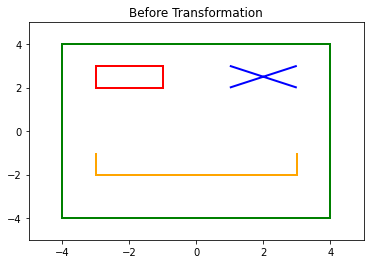

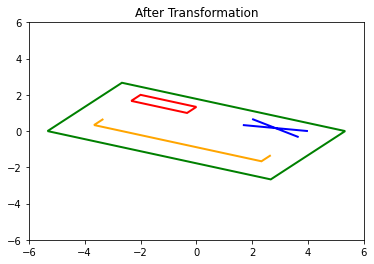

In [164]:
#Exercise 1 Solution for generating results

# The following lines import the packages for drawing the shapes
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

# import the numpy package in the np namespace
import numpy as np

# the following lines prevent Python from opening new windows for figures. 
%matplotlib inline 

#function for drawing the different parts
def draw_polygon(vertices, codes, ax, color='green'):
    path = Path(vertices, codes)

    patch = patches.PathPatch(path, edgecolor=color, lw=2, fill = False)
    ax.add_patch(patch)
    
#function for plotting the figure before transformation  
def plot_shapes_before(a,b): 
    
    #start drawing figure
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlim(-5,5)   #x axis and y axis limits
    ax.set_ylim(-5,5)

    # array containing all vertices for part 1
    vertices = np.array([
        [a, a],   #first part
        [a, -a],  #second part
        [-a, -a], #third part
        [-a, a],  #fourth part
        [a, a]    #fifth part
        ])

    # list of codes for drawing the figure
    codes = [
         Path.MOVETO,
         Path.LINETO,
         Path.LINETO,
         Path.LINETO,
         Path.CLOSEPOLY
         ]
    
    codes1 = [
         Path.MOVETO,
         Path.LINETO,
         Path.LINETO,
         Path.LINETO
         ]
    
    codes2 = [
        Path.MOVETO,
        Path.LINETO,
        Path.MOVETO,
        Path.LINETO, 
        ]
    
    # array containing all vertices for part 2
    vertices2 = np.array([
        [ 1-a, a-1],    #first part
        [ -a/4, a-1],   #second part
        [ -a/4, a/2],   #third part
        [ 1-a, a/2],    #fourth part
        [ 1-a, a-1]     #fifth part
        ])
    
    # array containing all vertices for part 3
    vertices3 = np.array([
        [ a/4, a-1],   #first part
        [ a-1, a/2],   #second part
        [ a-1, a-1],   #third part
        [ a/4, a/2],   #fourth part
        ])
    
    # array containing all vertices for part 4
    vertices4 = np.array([
        [ a-1, -a/4],  #first part
        [ a-1, -a/2],  #second part
        [ 1-a, -a/2],  #third part
        [ 1-a, -a/4],  #fourth part
        ])

    #figures for all the parts
    
    draw_polygon(vertices, codes, ax, 'green')
    draw_polygon(vertices2, codes, ax, 'red')
    draw_polygon(vertices3, codes2, ax, 'blue')
    draw_polygon(vertices4, codes1, ax, 'orange')
    
    plt.title("Before Transformation") #title for graph 'Before Transformation'
    plt.show() #show plot
    
plot_shapes_before(4,3) #calls on plot_shapes_before function to draw diagrams before the transformation taking the arguments a=4, b =3

def transformation_matrix(b): #transformation matrix to be used for transformation at later step
    transformation_matrix = np.matrix([
        [1, 1/b],
        [-1/b, 1/b],
    ])
    return transformation_matrix # function now returns the transformation matrix when called

#this function takes the coordinate parameters and transforms them 
def transformation(i, transformation_matrix):
    new = transformation_matrix*i.transpose() #new transformation given by transposing coordinate points and multiplying with transformation matrix
    return new.transpose() #returns coordinate parameters after transformation


#function for plotting the figure after the transformation
def plot_shapes_after(a,b):
    
    #Matrix A, which is the transformation matrix
    x = np.matrix( [
    [b/b, 1/b],  #first row of matrix A
    [-1/b, 1/b] #second row of matrix A
    ])
    
    #start plotting the figure
    fig = plt.figure() 
    ax = fig.add_subplot(111) 
    ax.set_xlim(-6,6) #set x axis limit
    ax.set_ylim(-6,6) #set y axis limit
                                   
    #call on the function to plot the figure using different coordinates of the respective parts, transformation matrix, codes, ax, and desired colour of shape
    draw_polygon(transformation(vertices, transformation_matrix(3)), codes, ax, 'green')
    draw_polygon(transformation(vertices2, transformation_matrix(3)) , codes, ax, 'red')
    draw_polygon(transformation(vertices3, transformation_matrix(3)), codes2, ax, 'blue')
    draw_polygon(transformation(vertices4, transformation_matrix(3)), codes1, ax, 'orange')
    plt.title("After Transformation") #title for graph 'After Transformation'
    plt.show()
    
plot_shapes_after(4,3) #plots the shapes after using parameters a = 4, and b = 3



***
While using the coordinates given for each of the different parts, the program outputs the original graph ('Before Transformation') given the values a=4 and b=3, it then transforms each of the coordinates using the transformation matrix 
$A = 1/b \begin {pmatrix} 
b & 1 \\
-1& 1 \\
\end{pmatrix}$ and plots the new coordinate points onto a new graph ('After Transformation').

Based upon the output diagram 'After Transformation', we can conclude that the transformation matrix A causes a rotation, shear and scaling to the orginal diagram, since the output diagram ('After Transformation') suggests the original diragm was rotated in the clockwise direction, sheared parallel to the x axis, and scaled by a factor less than 1.

****



## Exercise 2: Differential Equations

This exercise consits of an inital value problem, wherein we have a Differential Equation of the form 
$\frac{dy}{dx}= x + \frac{y}{5}$ .
<br> 
To solve for Euler's method to obtain the numerical (approximated) solution, we must apply the general formula: 
<br>
y<sub> n+1</sub> = Y<sub>n</sub> +h*f (X<sub>n</sub>, Y<sub>n</sub>) , where h is the step-size. In the solution below we have tested our method with different step sizes, h (conclusion of which was drawn later). 

To solve for the Analytical (Exact) solution
I have then solved the Differential Equation using the form :
<br>

$\frac{dy}{dx} + \rho(x)y =Q(x) $   for a First Order Linear Diffrential Equation
<br>

Solving the first order linear ODE:
<br>

$\frac{dy}{dx} - \frac{1}{y} y = x $
<br>

Using Integrating Factor Method: 
<br>

$(\rho(x).y)'= (e^\frac{1x}{5}.y)' = x.e^\frac{1x}{5} $
<br>

Solve: $y = -5x -25 + c.e^\frac{x}{5} $ (General Solution)

$y(x) = 5x -25 + 22e^\frac{x}{5}$ (Particular Solution)
<br>

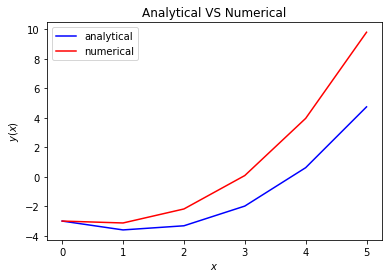

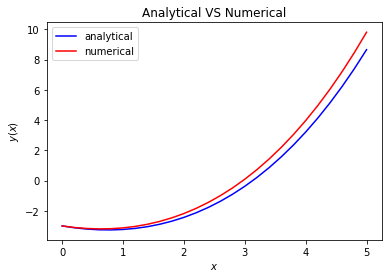

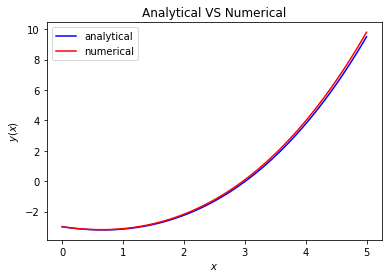

In [163]:
import numpy as np
import matplotlib.pyplot as plt

#Exercise 2 Solution 

# use Euler's method to obtain the numerical (approximated) solution, 
# and compare the numerical results to the analytical results

# y_init: the initial value of y
# step_size: the step sizes provided of 1, 0.2, and 0.05 on the interval [0, 5]
# time: the given time period
# steps: the number of steps

# import the numpy package in the np namespace
import numpy as np


# this line will load the plotting function into the namespace plt.
import matplotlib.pyplot as plt

# the following lines prevent Python from opening new windows for figures. 
%matplotlib inline


# use Euler's method to solve the population growth problem numerically, 
# and compare the numerical results to the analytical results

# y_init: the initial y value
# X_init : the inital x value 
# step_size: the time step size
# t: the given interval period
# steps: the number of steps during the interval

# funtion to plot both numerical and analytical (exact) methods
# Create a new figure
def eulers(Y_init, step_size, X_init, interval):
    steps = int(interval/step_size)
    
    x = np.linspace(0, interval, steps+1)
    Y = np.zeros(steps+1) #inital array of zeros
    x = np.zeros(steps+1) #inital array of zeros
    Y[0] = Y_init  
    x[0] = X_init
    
    
    for n in range(0, steps): #for loop to iterate through array and add to it 
        Y[n+1] = Y[n] + step_size*(x[n]+(Y[n]/5)) #step size multipled by the gradient
        x[n+1] =  step_size+(x[n]) #Increase the step size for each iteration, by adding the step-size to the previous x[n]
    
    plt.plot(x,Y,'b-')                               
    plt.plot(x,(-5*x-25)+22*np.exp(x/5), 'r-')                              
                                   
 
    plt.title("Analytical VS Numerical") #graph title                            
    plt.legend(['analytical', 'numerical'], loc = 'upper left') #graph legends
    plt.xlabel('$x$') #x axis label
    plt.ylabel('$y(x)$') #y axis label
    plt.show()

    
eulers(-3, 1, 0, 5) #call the function eulers to plot function with inital value of y = -3, step size 1 , inital value of x =0, interval of 5
eulers(-3, 0.2, 0, 5) #call the function eulers to plot function with inital value of y = -3,step size 0.2, inital value of x =0, interval of 5
eulers(-3, 0.05, 0, 5) #call the function eulers to plot function with inital value of y = -3, step size 0.05, inital value of x =0, interval of 5


***
We can compare the numerical solution (Euler's method) to the analytical solution. 
Since we have worked out the analytical (exact) solution, we can analyse the effectiveness of that approach by comparing the solution found by both numerical and analytical.
<br>

From the 3 graphs plotted above we can conclude that as the step size (h) gets smaller in each graph (from h=1 to h=0.2, to h=0.05) in the Euler's method, the error between the approximate solution and the exact solution decreases (in fact it becomes very small). Therefore graph 3, in which h=0.05, is the closest to the analytical solution.
***
